In [1]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12783, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 12783 (delta 34), reused 45 (delta 25), pack-reused 12719
Receiving objects: 100% (12783/12783), 12.40 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (8789/8789), done.
/content/yolov5
     |████████████████████████████████| 596 kB 30.7 MB/s 
     |████████████████████████████████| 145 kB 54.1 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 21.6 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 30.5 MB/s 
     |████████████████████████████████| 178 kB 65.0 MB/s 
     |████████████████████████████████| 4.3 MB 59.1 MB/s 
     |████████████████████████████████| 138 kB 76.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into ac

In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UbpQvr8BCrqFOiOXaB98")
project = rf.workspace("new-workspace-iaf2r").project("invoice-na2yo")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Invoice-1 in yolov5pytorch:: 100%|██████████| 154/154 [00:00<00:00, 904.80it/s]


In [4]:
cd /content/yolov5

/content/yolov5


In [5]:
!python train.py --img 416 --batch 32 --epochs 500 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/Invoice-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "train.py", line 642, in <module>
    main(opt)
  File "train.py", line 512, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 443, in check_file
    assert len(files), f'

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Form-16-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-105-gd257c75 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/3 /content/datasets/Form-16-1/test/images/19_jpg.rf.6ade2ff76df63593e6786cd2cf4e5078.jpg: 416x416 2 Deducter TAN Numbers, 1 Name - Address_Employee, Done. (0.028s)
image 2/3 /content/datasets/Form-16-1/test/images/23_jpg.rf.7557118d5bff63b48ecefb9c4d2344d8.jpg: 416x416 1 Name - Address_Employee, Done. (0.027s)
image 3/3 /content/datasets/Form-1

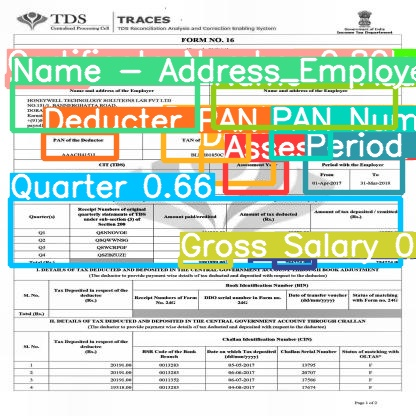

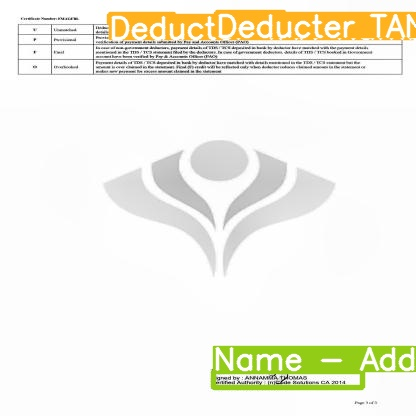

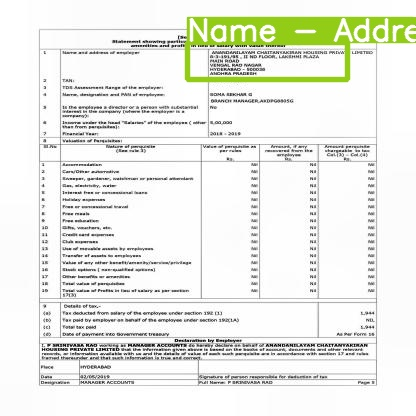

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#export your model's weights for future use
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install -q requests pillow

In [ ]:
import requests
import base64
import io
from PIL import Image

In [ ]:
path = "/content/0.jpg"

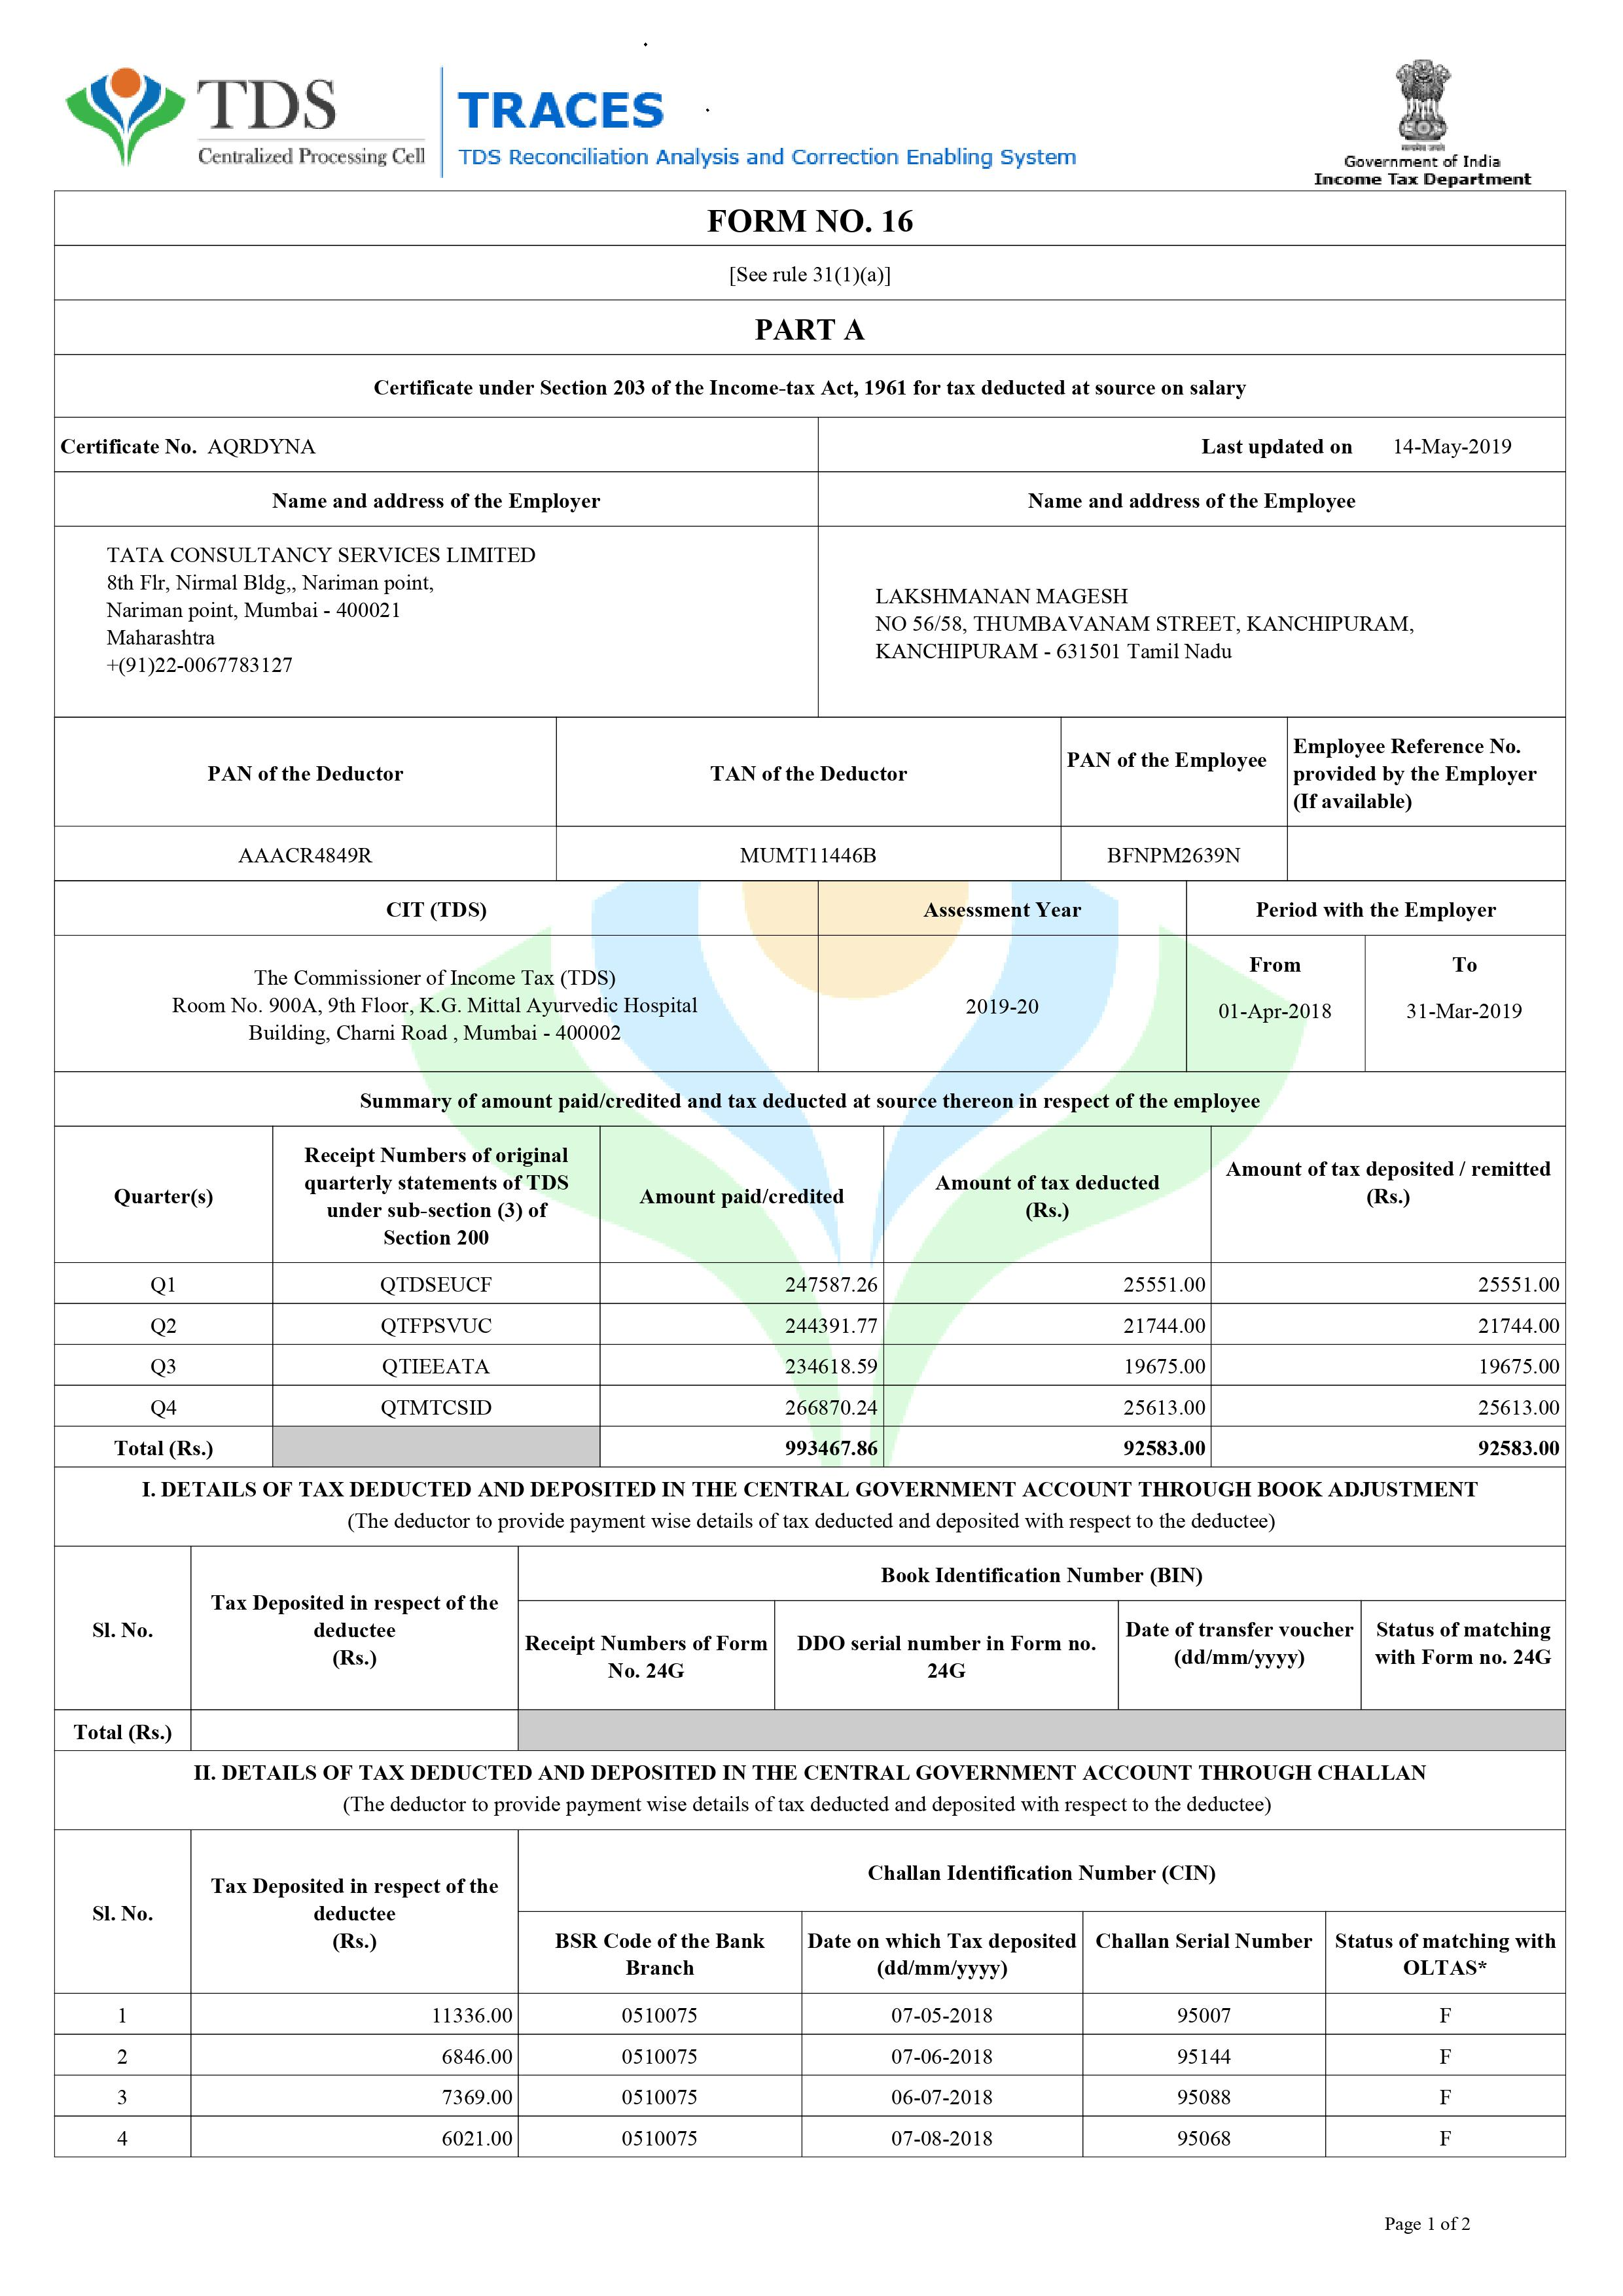

In [ ]:
import glob
from IPython.display import Image, display


display(Image(filename=path))
print("\n")

In [ ]:
import json
r=r.json()
r=json.dumps(r)

In [ ]:
out_file = open("/content/myfile.json", "w")
json.dump(r, out_file) 
out_file.close() 